# Predict Customer Churn for a telecom operator using logistic regression and Decision Tree

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load the dataset
df_churn = pd.read_excel("C:\\DataSets\\CustomerChurn.xlsx")
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
#check for null value
pd.isnull(df_churn).any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [5]:
#convert categorical variables to dummy coding
for col in df_churn.columns:
    if df_churn[col].dtype == 'object':
        df_churn[col] = pd.Categorical(df_churn[col]).codes

In [6]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,74,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,3624,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,536,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,3570,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,674,1


In [7]:
#create dependent and independent variables
x1 = df_churn.drop('Churn', axis = 1)
y = df_churn['Churn']
x = x1.drop('customerID', axis = 1)

In [8]:
#create train and test set
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 1)
train_x.shape
test_x.shape
train_x.shape
test_x.shape

(5282, 19)

(1761, 19)

(5282, 19)

(1761, 19)

In [9]:
#Build Logistic regression model

In [10]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [11]:
log.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
log.coef_

array([[ -1.03526616e-01,   2.23671999e-01,   3.22997214e-02,
         -1.62855909e-01,  -2.23875858e-03,  -5.57201998e-01,
          1.21502761e-01,   4.80960464e-02,  -2.46496020e-01,
         -1.18541614e-01,  -8.88962209e-02,  -2.29380294e-01,
          2.36160795e-02,   4.34824618e-02,  -7.07149839e-01,
          2.13820835e-01,  -9.45664832e-02,   3.25300082e-02,
         -4.77864198e-04]])

In [13]:
#find out key predictor of churn
coeff = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(log.coef_))], axis = 1)
coeff.columns = ("Variable", "coeff")
coeff.sort_values("Variable", ascending = True)
#coeff

,Variable,coeff
14,Contract,-0.707150
3,Dependents,-0.162856
10,DeviceProtection,-0.088896
7,InternetService,0.048096
17,MonthlyCharges,0.032530
6,MultipleLines,0.121503
9,OnlineBackup,-0.118542
8,OnlineSecurity,-0.246496
15,PaperlessBilling,0.213821
2,Partner,0.032300


In [14]:
classes = log.predict(test_x)
print(classes.size)
print("Positive Cases in test data", test_y[test_y == 1]. shape[0])
print("Negative Cases in test data", test_y[test_y == 0]. shape[0])

1761
Positive Cases in test data 434
Negative Cases in test data 1327


In [15]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y, classes))

Accuracy Score
0.804656445202


In [16]:
print("precision/recalls metrics")
print(metrics.classification_report(test_y, classes))

precision/recalls metrics
             precision    recall  f1-score   support

          0       0.85      0.90      0.87      1327
          1       0.62      0.53      0.57       434

avg / total       0.80      0.80      0.80      1761



In [17]:
print("AUC")
auc = metrics.roc_auc_score(test_y, classes)
auc

AUC


0.71145110935931855

Confusion matrix


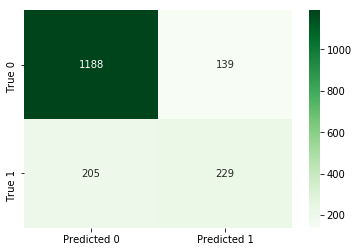

In [18]:
import matplotlib.pyplot as plt
print("Confusion matrix")
cf = metrics.confusion_matrix(test_y, classes)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True, cmap = "Greens", fmt = "d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();

(0, 1)

(0, 1)

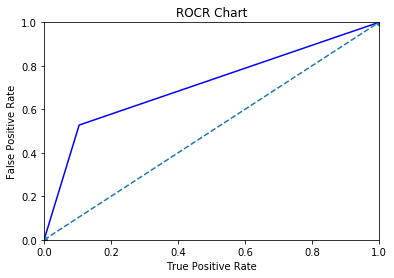

In [19]:
#ROC Chart
fpr, tpr, th = roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROCR Chart')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

## Remove insignificant independent variable and build the model again

In [20]:
#find out key predictor of churn
coeff = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(log.coef_))], axis = 1)
coeff.columns = ("Variable", "coeff")
coeff.sort_values("Variable", ascending = True)
#coeff

,Variable,coeff
14,Contract,-0.707150
3,Dependents,-0.162856
10,DeviceProtection,-0.088896
7,InternetService,0.048096
17,MonthlyCharges,0.032530
6,MultipleLines,0.121503
9,OnlineBackup,-0.118542
8,OnlineSecurity,-0.246496
15,PaperlessBilling,0.213821
2,Partner,0.032300


In [21]:
x1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,536
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3570
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,674


In [22]:
#Remove TotalCharges as it seems insigficant

In [23]:
x2 = df_churn.drop('customerID', axis = 1)
x2 = x2.drop('Churn', axis = 1)
#x2 = x2.drop('DeviceProtection', axis = 1)
#x2 = x2.drop('InternetService', axis = 1)
#x2 = x2.drop('MonthlyCharges', axis = 1)
#x2 = x2.drop('Partner', axis = 1)
#x2 = x2.drop('PaymentMethod', axis = 1)
#x2 = x2.drop('StreamingTV', axis = 1)
#x2 = x2.drop('StreamingMovies', axis = 1)
x2 = x2.drop('TotalCharges', axis = 1)
#x2 = x2.drop('tenure', axis = 1)
x2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70


In [24]:
#create train and test set
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, y, test_size = 0.25, random_state = 1)
train_x2.shape
test_x2.shape
train_x2.shape
test_x2.shape

(5282, 18)

(1761, 18)

(5282, 18)

(1761, 18)

In [25]:
#Build Logistic regresstion model

In [26]:
from sklearn.linear_model import LogisticRegression
log2 = LogisticRegression()

In [27]:
log2.fit(train_x2, train_y2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
log2.coef_

array([[-0.00801107,  0.24170286,  0.05320715, -0.09446304, -0.03609807,
        -0.90301666,  0.09424371,  0.24915069, -0.26043632, -0.1246404 ,
        -0.09785369, -0.24362926,  0.00212574,  0.03318368, -0.64467767,
         0.32791677,  0.04828335,  0.02828557]])

In [29]:
#find out key predictor of churn
coeff2 = pd.concat([pd.DataFrame(x2.columns), pd.DataFrame(np.transpose(log2.coef_))], axis = 1)
coeff2.columns = ("Variable", "coeff")
coeff2.sort_values("Variable", ascending = True)
#coeff

,Variable,coeff
14,Contract,-0.644678
3,Dependents,-0.094463
10,DeviceProtection,-0.097854
7,InternetService,0.249151
17,MonthlyCharges,0.028286
6,MultipleLines,0.094244
9,OnlineBackup,-0.124640
8,OnlineSecurity,-0.260436
15,PaperlessBilling,0.327917
2,Partner,0.053207


In [30]:
classes2 = log2.predict(test_x2)
print(classes2.size)
print("Positive Cases in test data", test_y2[test_y2 == 1]. shape[0])
print("Negative Cases in test data", test_y2[test_y2 == 0]. shape[0])

1761
Positive Cases in test data 434
Negative Cases in test data 1327


In [31]:
print("Accuracy Score")
print(metrics.accuracy_score(test_y2, classes2))

Accuracy Score
0.804656445202


In [32]:
print("precision/recalls metrics")
print(metrics.classification_report(test_y2, classes2))

precision/recalls metrics
             precision    recall  f1-score   support

          0       0.86      0.88      0.87      1327
          1       0.61      0.56      0.59       434

avg / total       0.80      0.80      0.80      1761



In [33]:
print("AUC")
auc2 = metrics.roc_auc_score(test_y2, classes2)
auc2

AUC


0.72230508509892033

Confusion matrix


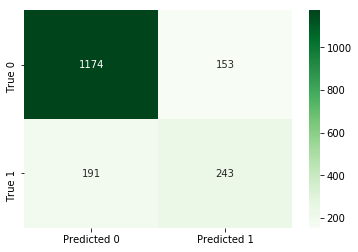

In [34]:
import matplotlib.pyplot as plt
print("Confusion matrix")
cf = metrics.confusion_matrix(test_y2, classes2)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True, cmap = "Greens", fmt = "d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();

(0, 1)

(0, 1)

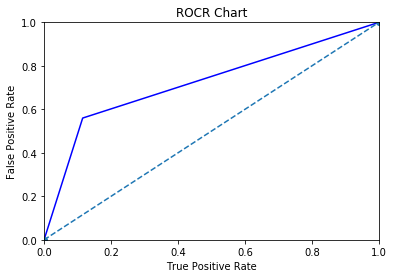

In [35]:
#ROC Chart
fpr, tpr, th = roc_curve(test_y2, classes2)
roc_auc = metrics.auc(fpr, tpr)
plt.title('ROCR Chart')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

## Conclusion

Before removing TotalCharges from the calculation, AUC score was .71145110935931855
After removing TotalCharges from the calculation, AUC score is .72230508509892033
Hence model built by removing TotalCharges is a better model

In [ ]:
#Try decision tree with train_x and train_y

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = "gini", max_depth = 2)
dt.fit(train_x, train_y)
classes = dt.predict(test_x)
auc = metrics.roc_auc_score(test_y, classes)
auc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.75500331644435492

In [40]:
#plot the tree
from sklearn import tree
import pydotplus as pydot
with open ("treepic.txt", "w") as x:
    x = tree.export_graphviz(dt, out_file = x)

In [41]:
pwd

'C:\\Users\\ekrigos\\Desktop\\Krishna\\DataS\\REVA\\Assessments\\Assignment2_PredictiveAnalytics_Churn'

In [ ]:
#apply the code in http://webgraphviz.com

In [42]:
#print accuracy score
print(metrics.accuracy_score(test_y, classes))
print('Precision/Recall Metrics')
print(metrics.classification_report(test_y, classes))
print('AUC')
auc = metrics.roc_auc_score(test_y, classes)
auc

0.756956274844
Precision/Recall Metrics
             precision    recall  f1-score   support

          0       0.90      0.76      0.82      1327
          1       0.50      0.75      0.60       434

avg / total       0.80      0.76      0.77      1761

AUC


0.75500331644435492

In [ ]:
#Using decsion tree, AUC score is better than using Logistic regression